# Übungen zur Regressionsanalyse

## Aufgabe 1

> Beantworten Sie die folgenden Fragen.

1) Welches mathematische Standardverfahren wird in der Regel angewandt, um eine Regressionsgerade durch eine Punktwolke zu legen?

__A: *Die Methode der kleinsten Quadrate (ordinary least squares).*__

2) Was bezeichnet der Begriff *overfitting*? Welches Problem entsteht dabei? Was wäre ein passendes, deutsches Wort?

__A: *overfitting bezeichnet die zu starke Anpassung an Trainingsdaten. Die Gerade/Kurve liefert keine guten Schätzwerte über die Trainingsdaten hinaus. Deutsches Wort: Überanpassung.*__

3) Welche Möglichkeiten gibt es, *overfitting* zu vermeiden?

__A: *L1 penalty (Lasso), L2 penalty (Ridge), Elastic net.*__

4) Welchen formal-mathematischen Effekt hat die Verwendung des *L1 penalty* auf die Attribute im Vektor? 

__A: *Durch L1 penalty wird, basierend auf dem gewählten alpha, die Quadratsumme der absoluten Differenz zwischen Datenpunkt und Schätzwert minimiert.*__

5) Warum können nur hierbei Nullen entstehen im Gegensatz zum L2 penalty?

__A: *Nullen können entstehen, da der Term im L1 penalty nicht quadriert wird.*__

6) Was passiert, wenn Lambda = 0 ist?

__A: *Dann handelt es sich um ein OLS-Modell.*__

## Aufgabe 2

> Verwenden Sie den Boston-Datensatz aus der sklearn-Bibliothek, um eine Regressionsanalyse durchführen zu können. 

2.1 Lassen Sie sich zunächst Informationen über den Datensatz ausgeben.

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

2.2 Plotten Sie die Datenpunkte mit dem Feature 'NOX' auf der X-Achse.

Text(0.5,1,'Immobilienpreise in Boston')

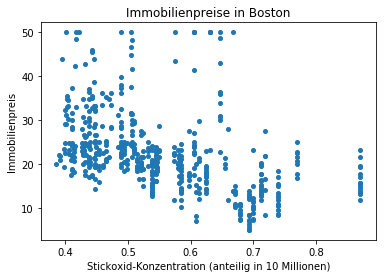

In [10]:
from matplotlib import pyplot as plt
plt.plot(boston.data[:,4], boston.target, 'o', markersize = 4)
plt.xlabel('Stickoxid-Konzentration (anteilig in 10 Millionen)')
plt.ylabel('Immobilienpreis')
plt.title('Immobilienpreise in Boston')

2.3 Wie erklärt sich der freie weiße Bereich oben rechts?

__A: *Je teurer die Immobilie, desto geringer ist die Wahrscheinlichkeit einer Umweltbelastung durch Stickoxide. Teure Immobilien sind eher außerhalb von Städten zu finden.*__

2.4 Legen Sie mithilfe der Methode aus Frage eins (OLS) eine Regressionsgerade durch die Punkte.

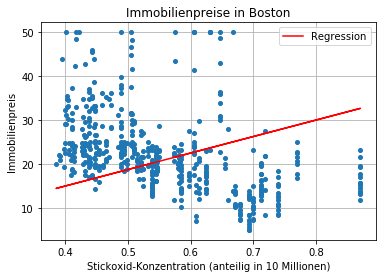

In [5]:
import numpy as np

x_old = boston.data[:,4]
x_old = np.array([[v] for v in x_old])

y = boston.target
slope = np.linalg.lstsq(x_old,y, rcond=None)

plt.plot(x_old[:,0], y, 'o', markersize = 4)
plt.plot(x_old[:,0],slope[0][0] * x_old[:,0], 'r', label='Regression')
plt.xlabel('Stickoxid-Konzentration (anteilig in 10 Millionen)')
plt.ylabel('Immobilienpreis')
plt.title('Immobilienpreise in Boston')
plt.grid(True)
plt.legend()
plt.show()

2.5 Beurteilen Sie (kritisch) die eingezeichnete Modellfunktion.

__A: *Die eingezeichnete Funktion liefert keine guten Schätzwerte, da sie in den weißen Bereich hineingeht.*__


2.6 Berechnen Sie den RMSE (*root mean squared error*) Ihrer Funktion.

In [6]:
slope,total_error,_,_ = np.linalg.lstsq(x_old,y, rcond=None)
rmse = np.sqrt(total_error[0]/len(x_old))
print('RMSE: {:.3}'.format(rmse))

RMSE: 11.8


2.7 Welche Möglichkeit gibt es, den RMSE zu verringern? Wenden Sie sie an.

__A: *Durch das Hinzufügen einer Konstanten lässt sich der RMSE verringern.*__


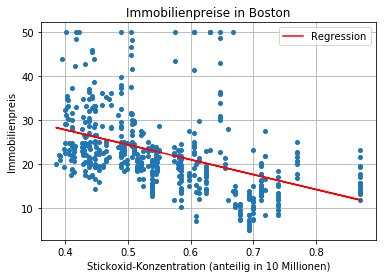

In [7]:
x = boston.data[:,4]
x = np.array([[v,1] for v in x]) # An dieser Stelle wird der zweiten Dimension von x eine 1 hinzugefügt
y = boston.target
(slope,bias),_,_,_ = np.linalg.lstsq(x,y, rcond=None)
plt.plot(x[:,0], y, 'o', markersize = 4)
plt.plot(x[:,0], slope * x[:,0]+ bias, 'r', label='Regression')
plt.xlabel('Stickoxid-Konzentration (anteilig in 10 Millionen)')
plt.ylabel('Immobilienpreis')
plt.title('Immobilienpreise in Boston')
plt.grid(True)
plt.legend()
plt.show()

2.8 Hat sich der RMSE verringert? Wenn ja, warum?

In [8]:
slope,total_error,_,_ = np.linalg.lstsq(x,y, rcond=None)
rmse = np.sqrt(total_error[0]/len(x))
print('RMSE: {:.3}'.format(rmse))

RMSE: 8.31


__A: *Durch die hinzugefügte Konstante hat sich die Streuung um die Regressionsgerade nun deutlich verringert.*__


2.9 Wenden Sie den *L1 penalty* an, plotten Sie anschließend die Regressionsgerade, die optimierte Regressionsgerade (aus Aufgabe 2.6) sowie den *L1 penalty* selbst.

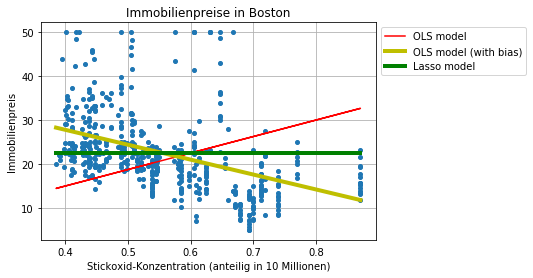

In [9]:
from sklearn.linear_model import LinearRegression, Lasso
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt

boston = load_boston()
fig, ax = plt.subplots()
ax.plot(x_old[:,0], y, 'o', markersize = 4)

plt.title('Immobilienpreise in Boston')
plt.xlabel('Stickoxid-Konzentration (anteilig in 10 Millionen)')
ax.set_ylabel('Immobilienpreis')


x_old = boston.data[:,4]
x_old = np.array([[v] for v in x_old])

y = boston.target
slope = np.linalg.lstsq(x_old,y, rcond=None)


plt.plot(x_old[:,0],slope[0][0] * x_old[:,0], 'r', label='OLS model')

x = boston.data[:, 4]
xmin = x.min()
xmax = x.max()
x = np.transpose(np.atleast_2d(x))
y = boston.target

lr = LinearRegression()
lr.fit(x, y)
ax.plot([xmin, xmax], lr.predict([[xmin], [xmax]]), '-', lw=4, color = 'y', label='OLS model (with bias)')

# equivalent to las = Lasso(alpha = 1.0)
las = Lasso()
las.fit(x, y)
ax.plot([xmin, xmax], las.predict([ [xmin], [xmax] ]), '-', lw=4, color = 'g', label='Lasso model')
plt.grid(True)
ax.legend(loc=0, bbox_to_anchor=(1,1))